# Exercici 0:





Posem en una cel·la els codis dels mètodes de Jacobi, Gauss-Seidel i de $\omega$-relaxació

In [42]:
import numpy as np

def norma(u):
    return np.sqrt(sum(u**2))

def wrelax(A, b, x0, w, abstol=1.e-10, reltol=1.e-10, maxIter=1000):
    Emin = min (reltol*norma(x0),abstol)
    m, n = A.shape    
    x = x0.copy()
    i = 0
    acabat = False
    while not acabat:
        i = i + 1
        x0 = x.copy()
        for j in range(n): 
            x[j] = (1-w) * x[j] + (w/A[j,j]) * (b[j] - sum(A[j, :]*x[:]) + A[j,j]*x[j])
        Emin = min (reltol*norma(x),Emin)
        if((norma(x0 - x) < Emin) or i > maxIter):
            acabat = True
        
        if(i > maxIter):
            if(norma(x0 - x) > abstol and norma(x0-x) / norma(x) < reltol):
                return x, -1
            if(norma(x0 - x) > abstol and norma(x0-x) / norma(x) > reltol):
                return x, -2
            return x, -3
    return x, i

def Jacobi(A,b, x, abstol=1.e-10, reltol=1.e-10, maxIter = 1000):
  n = x.size
  xk = x.copy()
  atol = False
  rtol = False
  for k in range (maxIter):
    s = 0
    for i in range (n):
      s = sum(A[i,:]*x[:])
      s -= A[i,i]*x[i]
      xk[i] = 1/(A[i,i])*(b[i] - s)
    if atol == False and norma(xk - x) < abstol:
      atol = True
    if rtol == False and norma(xk-x)/norma(xk) < reltol:
      rtol = True
    if (atol and rtol):
      return xk, k
    x = xk.copy()
  if rtol:
    return xk, -1
  elif atol:
    return xk, -2
  return xk, -3

Creem la matriu A i els vectors b i $x_0$. Després apliquem els codis dels dos mètodes. 

En el cas del mètode de Gauss-Seidel donem a $\omega$ el valor  $\omega = 1$ ja que tots dos tenen el mateix codi.

In [43]:
A = np.zeros((8,8), dtype = np.float64) #Creem la matriu A del sistema.
for i in range (8):
    A[i,i] = 2
for i in range (7):
    A[i,i+1] = -1
    A[i+1,i] = -1

b = np.array([1,1,1,1,1,1,1,1], dtype = np.float64)
x = np.array([1,1,1,1,1,1,1,1], dtype = np.float64)

print (f"Jacobi : {Jacobi(A,b,x)}")
print (f"GS : {wrelax(A,b,x,1)}") # Apliquem el mètode de relaxació amb omega=1


Jacobi : (array([ 4.,  7.,  9., 10., 10.,  9.,  7.,  4.]), 373)
GS : (array([ 4.,  7.,  9., 10., 10.,  9.,  7.,  4.]), 194)


Veiem doncs que farem 373 iteracions amb el mètode de Jacobi i 194 si el fem amb el mètode de Gauss-Seidel.

Calculem ara el valor òptim de $\omega$ per al mètode de $\omega$-relaxació successiva i les iteracions necessàries.

Primer de tot, cal que determinem la matriu $G_1$. Ho farem resolent el sistema $$ (D+L) \cdot G_1 = D - U $$

Invertim la matriu D+L, ja que no és gaire difícil i el seu cost no serà gaire alt. Per 

On G_1 és la incògni

In [62]:
from scipy.linalg import solve_triangular

A = np.zeros((8,8), dtype = np.float64) #Creem la matriu A del sistema.
for i in range (8):
    A[i,i] = 2
for i in range (7):
    A[i,i+1] = -1
    A[i+1,i] = -1

b = np.array([1,1,1,1,1,1,1,1], dtype = np.float64)
x = np.array([1,1,1,1,1,1,1,1], dtype = np.float64)

"""X = solve_triangular(A,np.eye(8),lower = True)

print (U,X)
print (X*U)"""
U = np.zeros((8,8), dtype = np.float64) 
for i in range (7):
    U[i,i+1] = 1
print(solve_triangular(A+U,U))


[[0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0.  0.  0.  0. ]]


In [64]:


wopt = 2/(1+ np.sqrt(1))
print (wopt)

1.0


# Exercici 1
Cal crear una funció que resolgui una EDO, donada una funció F.

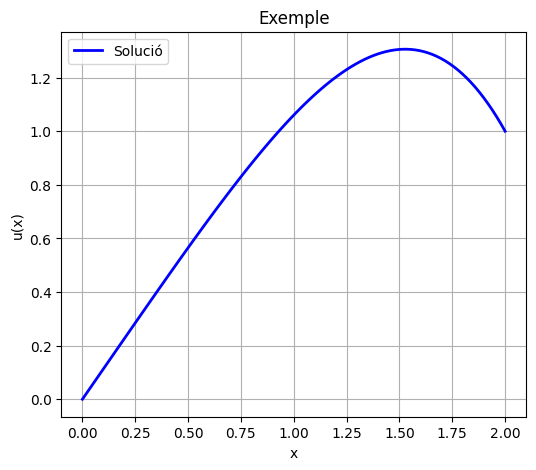

1.0685505050503792
1.084719515151389
-0.8084505050504953
1.0


In [68]:
import numpy as np
import math
import matplotlib.pyplot as plt
def solEstEq1D(a, b, ca, cb, N, F, maxIter=1.e5, tol=1.e-10):
    #On a i b són els extrems del interval, i ca i cb són els punts extrems
    #Definim el vector u i l'inicialitzem:
    u0 = (ca + cb) / 2
    u = np.full((N), u0, dtype=np.float64)
    u[0] = ca
    u[-1] = cb
    Fi = np.empty((N), dtype=np.float64)
    delta = (b - a)/N
    for i in range(N):
        Fi[i] = F(a + delta*i)

    for i in range(int(maxIter)):
        u[1:N-1] = (u[:N-2]+u[2:] + delta**2 * Fi[1:N-1])/2
    return(u, 0)




def dibuixaSol1D(u,a,b,titol='Exemple'):
    # Nombre de punts:
    Nplus1 = u.shape[0]

    # Malla equiespaiada:
    x = np.linspace(a,b,Nplus1)

    # Obrim la Figura i dibuixem:
    plt.figure(figsize=(6, 5))

    # Plot:
    plt.plot(x, u, label="Solució", color="b", linewidth=2)

    # Eixos i llegenda
    plt.xlabel("x")
    plt.ylabel("u(x)")
    plt.title(titol)
    plt.grid(True)
    plt.legend()

    # Mostrem el dibuix:
    plt.show()
def funcio(x):
    return x**2


N = 100
a,b = 0, 2
ca,cb = 0,1

u,niter = solEstEq1D(a, b, ca, cb, N, funcio, maxIter = 1.e5)
dibuixaSol1D(u,a,b)
print(u[50])
print(u[51])
print((u[50]-u[51])*N / (b - a))
print(funcio(a + 50*(b-a)/N))